<a href="https://colab.research.google.com/github/OptimizationExpert/Pyomo/blob/main/stable_marriage_CP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Developed by Alireza Soroudi
alireza.soroudi@gmail.com

Linkedin News letter : https://www.linkedin.com/newsletters/optimization-in-open-source-6874020019009859585/

Git hub: https://github.com/OptimizationExpert/Pyomo



In [2]:
!pip install ortools
from ortools.sat.python import cp_model # CP-SAT solver
import numpy as np
from random import randint
import random
from math import ceil
import pandas as pd
import matplotlib.pyplot as plt # Data visualization
from matplotlib.patches import Rectangle


In [3]:
KOLORS = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd",
            "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf",
            "#aec7e8", "#ffbb78", "#98df8a", "#ff9896", "#c5b0d5",
            "#c49c94", "#f7b6d2", "#c7c7c7", "#dbdb8d", "#9edae5",
            "#8c6d31", "#9c9ede", "#637939", "#e7cb94", "#b5cf6b",
            "#cedb9c", "#c7c7c7", "#bd9e39", "#e7969c", "#7b4173"]

In [4]:
Nw, Nm = 5, 5

women = [f"w{w}" for w in range(1,1+Nw) ]
men = [f"m{m}" for m in range(1,1+Nm) ]

ranking = [r for r in range(1,1+Nw)]
data = {}
for w in women:
  ranking = [r for r in range(1,1+Nw)]
  random.shuffle(ranking)
  for indx in range(Nm):
    data[w,men[indx]]= ranking[indx]

for m in men:
  ranking = [r for r in range(1,1+Nw)]
  random.shuffle(ranking)
  for indx in range(Nw):
    data[m,women[indx]]= ranking[indx]

data

{('w1', 'm1'): 3,
 ('w1', 'm2'): 1,
 ('w1', 'm3'): 4,
 ('w1', 'm4'): 2,
 ('w1', 'm5'): 5,
 ('w2', 'm1'): 3,
 ('w2', 'm2'): 2,
 ('w2', 'm3'): 5,
 ('w2', 'm4'): 1,
 ('w2', 'm5'): 4,
 ('w3', 'm1'): 4,
 ('w3', 'm2'): 3,
 ('w3', 'm3'): 2,
 ('w3', 'm4'): 1,
 ('w3', 'm5'): 5,
 ('w4', 'm1'): 3,
 ('w4', 'm2'): 5,
 ('w4', 'm3'): 4,
 ('w4', 'm4'): 2,
 ('w4', 'm5'): 1,
 ('w5', 'm1'): 2,
 ('w5', 'm2'): 4,
 ('w5', 'm3'): 5,
 ('w5', 'm4'): 1,
 ('w5', 'm5'): 3,
 ('m1', 'w1'): 3,
 ('m1', 'w2'): 4,
 ('m1', 'w3'): 1,
 ('m1', 'w4'): 2,
 ('m1', 'w5'): 5,
 ('m2', 'w1'): 3,
 ('m2', 'w2'): 5,
 ('m2', 'w3'): 4,
 ('m2', 'w4'): 1,
 ('m2', 'w5'): 2,
 ('m3', 'w1'): 5,
 ('m3', 'w2'): 1,
 ('m3', 'w3'): 4,
 ('m3', 'w4'): 2,
 ('m3', 'w5'): 3,
 ('m4', 'w1'): 5,
 ('m4', 'w2'): 2,
 ('m4', 'w3'): 4,
 ('m4', 'w4'): 3,
 ('m4', 'w5'): 1,
 ('m5', 'w1'): 1,
 ('m5', 'w2'): 5,
 ('m5', 'w3'): 4,
 ('m5', 'w4'): 3,
 ('m5', 'w5'): 2}

In [5]:
men = []
men=["Adam","Bob","Charlie","Dave","Edgar"]
women=["Alice","Barbara","Claire","Doris","Elsie"]
menRankWomen=[[5,1,2,4,3],
[4,1,3,2,5],
[5,3,2,4,1],
[1,5,4,3,2],
[4,3,2,1,5]];
womenRankMen=[[5,1,2,4,3],
[4,1,3,2,5],
[5,3,2,4,1],
[1,5,4,3,2],
[4,3,2,1,5]];
random.shuffle(womenRankMen)
random.shuffle(menRankWomen)


data = {}
for w in women:
  w_index = women.index(w)
  ranking = womenRankMen[w_index]
  for indx in range(Nm):
    data[w,men[indx]]= ranking[indx]

for m in men:
  m_index = men.index(m)
  ranking = menRankWomen[m_index]
  for indx in range(Nw):
    data[m,women[indx]]= ranking[indx]

data




{('Alice', 'Adam'): 4,
 ('Alice', 'Bob'): 1,
 ('Alice', 'Charlie'): 3,
 ('Alice', 'Dave'): 2,
 ('Alice', 'Edgar'): 5,
 ('Barbara', 'Adam'): 5,
 ('Barbara', 'Bob'): 3,
 ('Barbara', 'Charlie'): 2,
 ('Barbara', 'Dave'): 4,
 ('Barbara', 'Edgar'): 1,
 ('Claire', 'Adam'): 5,
 ('Claire', 'Bob'): 1,
 ('Claire', 'Charlie'): 2,
 ('Claire', 'Dave'): 4,
 ('Claire', 'Edgar'): 3,
 ('Doris', 'Adam'): 1,
 ('Doris', 'Bob'): 5,
 ('Doris', 'Charlie'): 4,
 ('Doris', 'Dave'): 3,
 ('Doris', 'Edgar'): 2,
 ('Elsie', 'Adam'): 4,
 ('Elsie', 'Bob'): 3,
 ('Elsie', 'Charlie'): 2,
 ('Elsie', 'Dave'): 1,
 ('Elsie', 'Edgar'): 5,
 ('Adam', 'Alice'): 4,
 ('Adam', 'Barbara'): 3,
 ('Adam', 'Claire'): 2,
 ('Adam', 'Doris'): 1,
 ('Adam', 'Elsie'): 5,
 ('Bob', 'Alice'): 4,
 ('Bob', 'Barbara'): 1,
 ('Bob', 'Claire'): 3,
 ('Bob', 'Doris'): 2,
 ('Bob', 'Elsie'): 5,
 ('Charlie', 'Alice'): 5,
 ('Charlie', 'Barbara'): 3,
 ('Charlie', 'Claire'): 2,
 ('Charlie', 'Doris'): 4,
 ('Charlie', 'Elsie'): 1,
 ('Dave', 'Alice'): 1,
 ('Dave'

In [6]:
menRankWomen = [[5, 3, 2, 4, 1],
 [5, 1, 2, 4, 3],
 [1, 5, 4, 3, 2],
 [4, 1, 3, 2, 5],
 [4, 3, 2, 1, 5]]

womenRankMen = [[5, 1, 2, 4, 3],
 [4, 3, 2, 1, 5],
 [4, 1, 3, 2, 5],
 [5, 3, 2, 4, 1],
 [1, 5, 4, 3, 2]]


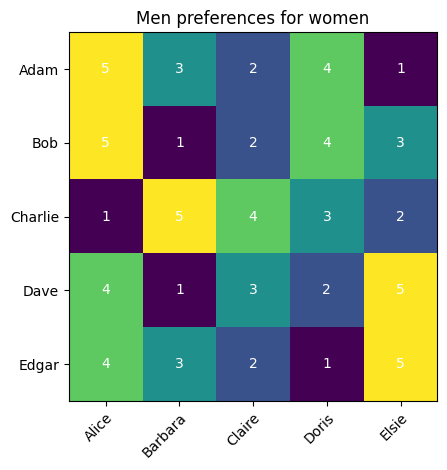

In [7]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib
import matplotlib as mpl

harvest = np.array(menRankWomen)


fig, ax = plt.subplots()
im = ax.imshow(harvest)

# Show all ticks and label them with the respective list entries
ax.set_yticks(np.arange(len(men)), labels=men)
ax.set_xticks(np.arange(len(women)), labels=women)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(men)):
    for j in range(len(women)):
        text = ax.text(j, i, harvest[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Men preferences for women")
fig.tight_layout()
plt.show()

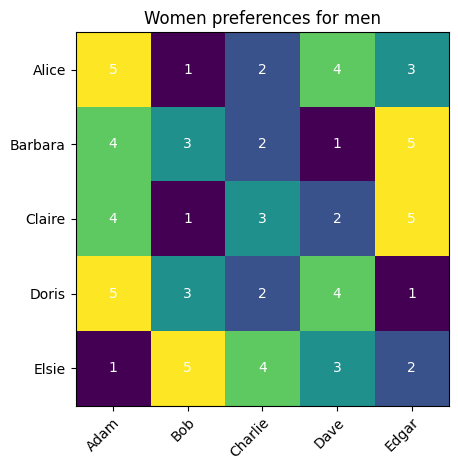

In [8]:
harvest = np.array(womenRankMen)


fig, ax = plt.subplots()
im = ax.imshow(harvest)

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(men)), labels=men)
ax.set_yticks(np.arange(len(women)), labels=women)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(men)):
    for j in range(len(women)):
        text = ax.text(j, i, harvest[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Women preferences for men")
fig.tight_layout()
plt.show()

In [15]:

class VarArraySolutionPrinter(cp_model.CpSolverSolutionCallback):
    """Print intermediate solutions."""
    def __init__(self, variables, men, women):
        cp_model.CpSolverSolutionCallback.__init__(self)
        self.__variables = variables
        self.__solution_count = 0
        self.__men = men
        self.__women = women
    def on_solution_callback(self):
        self.__solution_count += 1
        plt.figure(figsize=(6,6))

        men_satisfaction = sum(self.Value(v)*data[m,w] for (m,w),v in self.__variables.items())
        women_satisfaction = sum(self.Value(v)*data[w,m] for (m,w),v in self.__variables.items())
        if self.BestObjectiveBound() == self.objective_value:
          print(self.__solution_count , [(m,w) for (m,w),v in self.__variables.items() if self.Value(v)>0])
          print(f"M(OF) = {men_satisfaction} , W(OF) = {women_satisfaction} ")
          for (m,w),v in self.__variables.items():
            if self.Value(v)>0:

              x0,y0 = 1 , self.__men.index(m)
              x1,y1 = 4 , self.__women.index(w)
              plt.plot([x0,x1],[y0,y1], lw= 2)
              plt.text(x0-0.5,y0, s= m)
              plt.text(x1+0.2,y1, s= w)
              plt.scatter(x0,y0, s= 100, zorder=2)
              plt.scatter(x1,y1, s= 100, zorder=2)
          plt.axis("off")





    def solution_count(self):
        return self.__solution_count



1 [('Adam', 'Elsie'), ('Bob', 'Claire'), ('Charlie', 'Doris'), ('Dave', 'Barbara'), ('Edgar', 'Alice')]
M(OF) = 22 , W(OF) = 18 
OPTIMAL
40.0
Adam Elsie 5 4
Bob Claire 3 1
Charlie Doris 4 4
Dave Barbara 5 4
Edgar Alice 5 5


'\nAdam - Alice\nBob - Doris\nCharlie - Barbara\nDave - Claire\nEdgar - Elsie\n\nfor m in men:\n  print(m,[data[m,w] for w in women])\nfor w in women:\n  print(w,[data[m,w] for m in men])\n\n\nStable marriages\nAdam - Alice\nBob - Doris\nCharlie - Barbara\nDave - Claire\nEdgar - Elsie\n\n\n[Adam-Alice,Bob-Claire,Charlie-Doris,Dave-Barbara,Edgar-Elsie]\n[Adam-Alice,Bob-Doris,Charlie-Barbara,Dave-Claire,Edgar-Elsie]\n\n'

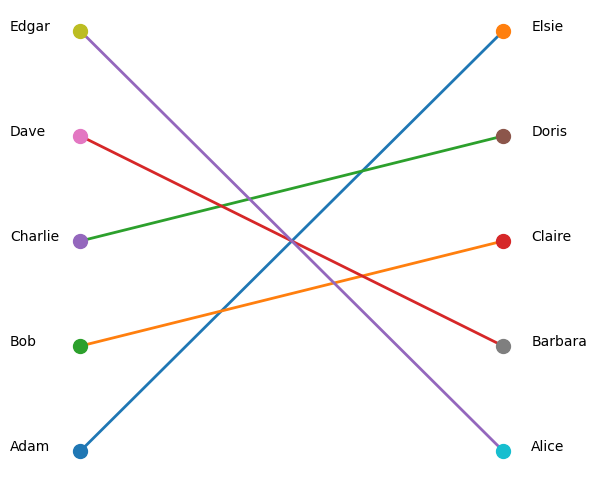

In [22]:
model = cp_model.CpModel()
solver = cp_model.CpSolver()
U = {(m,w):model.NewBoolVar(f"match_{m}_{w}")  for m in men for w in women}

for m in men:
  expressions = [U[m,w] for w in women]
  model.AddExactlyOne(expressions)

for w in women:
  expressions = [U[m,w] for m in men]
  model.AddExactlyOne(expressions)

#"""
for (m,w),v in U.items():
  # for men
  for w2 in women:
    if data[m,w2]>data[m,w] and w!=w2:
      model.Add(data[w2,m]<=sum([data[w2,m2]*U[m2,w2] for m2 in men if m!=m2])).OnlyEnforceIf(v)
  # for women
  for m2 in men:
    if data[w,m2]>data[w,m] and m!=m2:
      model.Add(data[m2,w]<=sum([data[m2,w2]*U[m2,w2] for w2 in women if w!=w2])).OnlyEnforceIf(v)
#"""

expressions = [v*(data[m,w] + data[w,m]) for (m,w),v in U.items()]
#model.Minimize(sum(expressions))
model.Maximize(sum(expressions))

solver.parameters.max_time_in_seconds = 60

solver.parameters.enumerate_all_solutions = False
solution_printer = VarArraySolutionPrinter(U, men, women)


status = solver.Solve(model, solution_printer)

if status == cp_model.OPTIMAL:
  print("OPTIMAL")
elif status == cp_model.FEASIBLE:
  print("FEASIBLE")
elif status == cp_model.INFEASIBLE:
  print("INFEASIBLE")
  print("FEASIBLE")
elif status == cp_model.UNKNOWN:
  print("UNKNOWN")
print(solver.ObjectiveValue())

for (m,w),v in U.items():
  if solver.value(v):
    print(m,w, data[m,w], data[w,m])